In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Reading CSV file
Loan=pd.read_csv("loan.csv",encoding="ISO-8859-1")
#print(Loan.head(5))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(Loan.shape)

(39717, 111)


In [4]:
#Check for Null Values 
round(100*(Loan.isnull().sum()/len(Loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [5]:
# Data Cleaning
Loan=Loan.dropna(axis=1,how='all')
round(100*(Loan.isnull().sum()/len(Loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [6]:
# Delete Columns where more than 60% values are missing
Loan=Loan.loc[:,round(Loan.isnull().sum()/len(Loan.index)*100,2)<60]
round(100*(Loan.isnull().sum()/len(Loan.index)),2)

round(Loan.isnull().sum()/len(Loan.index)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [7]:
print(Loan.shape)

(39717, 54)


# Univariate Analysis

In [8]:
numerical_feats = Loan.dtypes[Loan.dtypes != "object"].index
print("# of Numerical features: ", len(numerical_feats))

categorical_feats = Loan.dtypes[Loan.dtypes == "object"].index
print("# of Categorical features: ", len(categorical_feats))

# of Numerical features:  31
# of Categorical features:  23


In [9]:
Loan[categorical_feats].head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,...,other,Personal,972xx,OR,Jan-96,53.90%,f,May-16,May-16,INDIVIDUAL


In [10]:
Loan[numerical_feats].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,162.87,24000.0,27.65,0,1,...,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,59.83,30000.0,1.00,0,5,...,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,84.33,12252.0,8.72,0,2,...,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,339.31,49200.0,20.00,0,1,...,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,67.79,80000.0,17.94,0,0,...,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0


##### Count Unique applicants

In [11]:
print(len(Loan['member_id'].unique()))

39717


Clearly all applicants are unique

### Distribuition of the Loan Amount

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


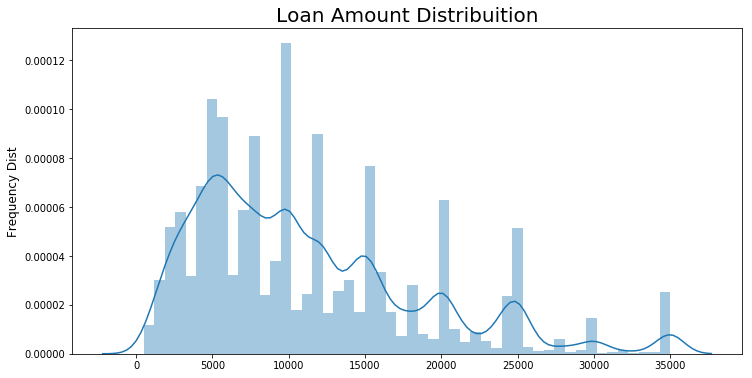

In [12]:
plt.figure(figsize=(12,6))

x = sns.distplot(Loan["loan_amnt"])
x.set_xlabel("", fontsize=12)
x.set_ylabel("Frequency Dist", fontsize=12)
x.set_title("Loan Amount Distribuition", fontsize=20)

plt.show()

In [13]:
print("The Mean of Loan Amounts: %f"%Loan["loan_amnt"].mean())
print("The Median of Loan Amounts: %f"%Loan["loan_amnt"].median())

The Mean of Loan Amounts: 11219.443815
The Median of Loan Amounts: 10000.000000


The frequency distribution of loan amount is more for lower amount of loans.

### Create a column with Percentage of total payment

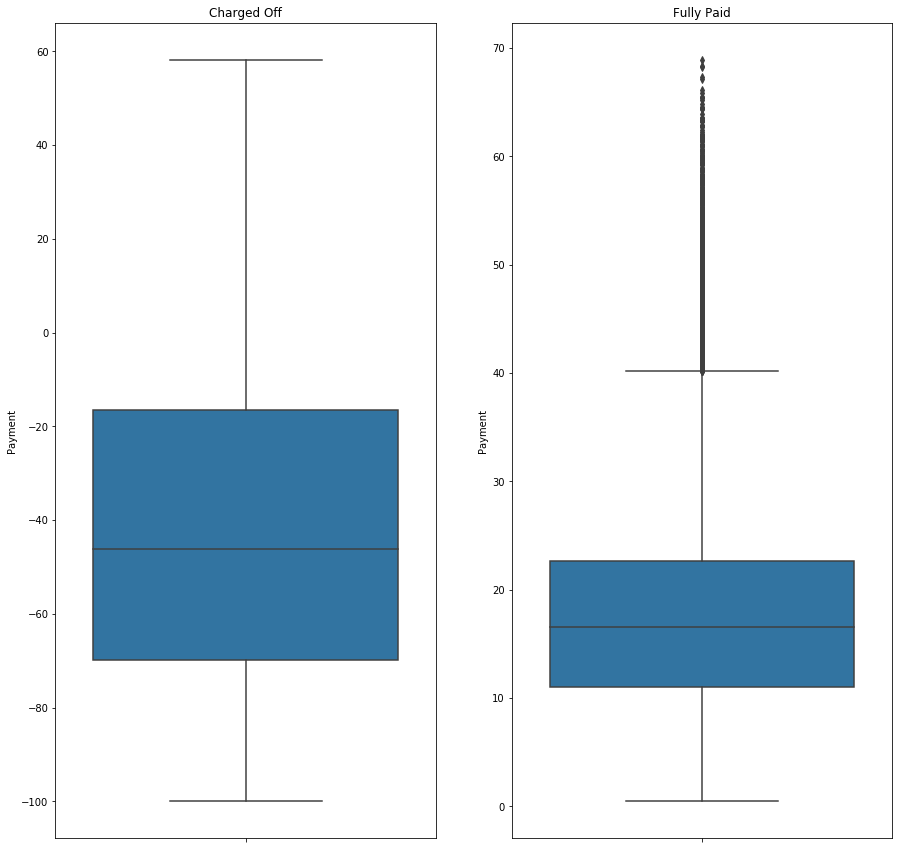

In [14]:

Loan['Payment']=round((Loan['total_pymnt']-Loan['funded_amnt'])*100/Loan['funded_amnt'],2)


# Box plots for Customers Fully paid and for Charged Off

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Charged Off')
sns.boxplot(y=Loan[Loan.loan_status=='Charged Off'].Payment)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=Loan[Loan.loan_status=='Fully Paid'].Payment)
plt.show()

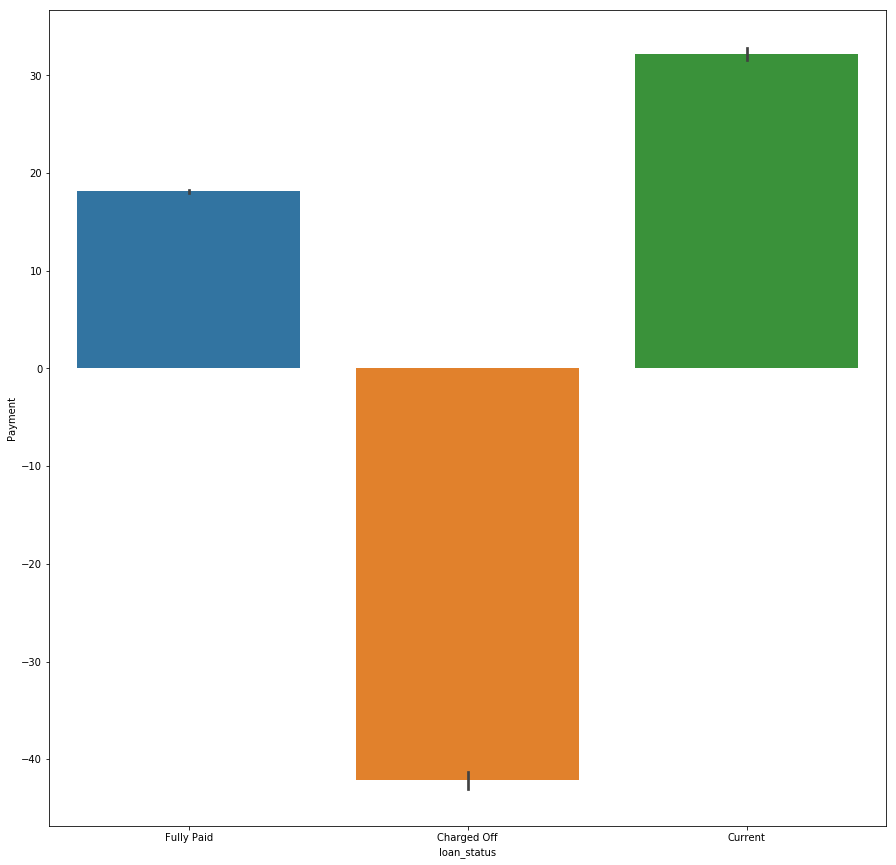

In [15]:
# Bar plot showing the customers those who paid fully, currently paying and charged off
plt.figure(figsize=(15,15))
sns.barplot(x='loan_status',y='Payment',data=Loan)

In [16]:
# Here we represent categorical variable loan stat into quantative payment percentage. From both of above plot we can 

Correlation with Numerical features with the column payment

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


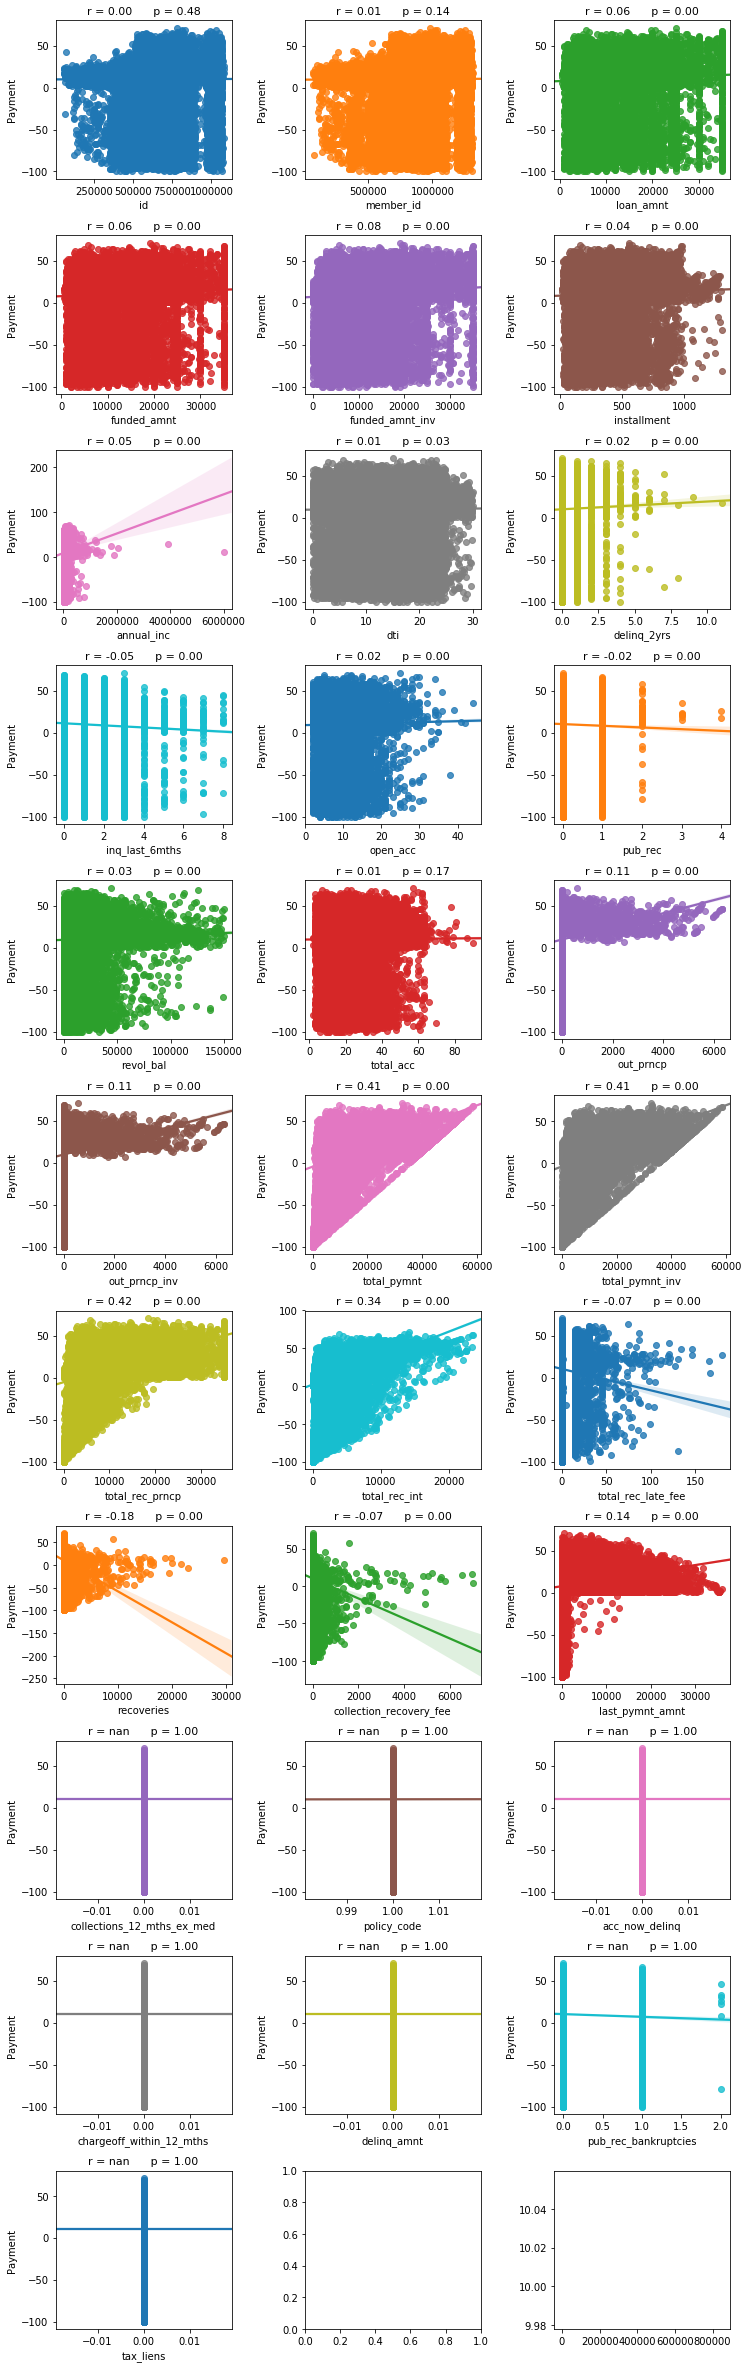

In [17]:
numerical_feats_lists=list(numerical_feats)
no_numerical_feats=len(numerical_feats_lists)
nr_cols=3
nr_rows=int(no_numerical_feats/nr_cols) + 1 if no_numerical_feats % nr_cols != 0 else int(no_numerical_feats/nr_cols)
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

    
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < no_numerical_feats:
            sns.regplot(Loan[numerical_feats_lists[i]], Loan['Payment'], ax = axs[r][c])
            stp = stats.pearsonr(Loan[numerical_feats_lists[i]], Loan['Payment'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   
    


If the correlation is above or equal to 40%, The variates are strong

In [1]:
strong_variates=['annual_inc','inq_last_6mths','total_pymnt','total_pymnt_inv']

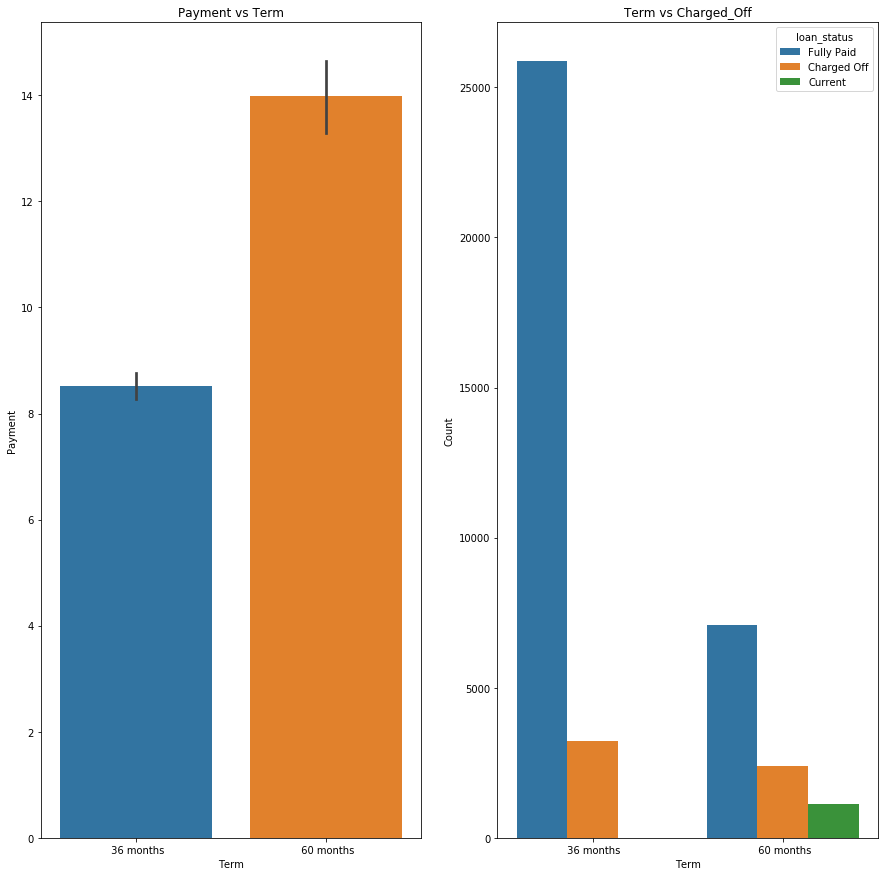

In [18]:
# Relation Between Term and Loan 
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='term',y='Payment',data=Loan)
plt.xlabel("Term")
plt.ylabel("Payment")
plt.title("Payment vs Term")


plt.subplot(1,2,2)
sns.countplot('term',hue='loan_status',data=Loan)
plt.xlabel("Term")
plt.ylabel("Count")
plt.title("Term vs Charged_Off")
plt.show()

Majority of guys who took loan for 36 months, have payed the debt.

In [19]:
Loan.loan_status.count()
Loan.groupby(['term','loan_status']).count().id

term        loan_status
 36 months  Charged Off     3227
            Fully Paid     25869
 60 months  Charged Off     2400
            Current         1140
            Fully Paid      7081
Name: id, dtype: int64

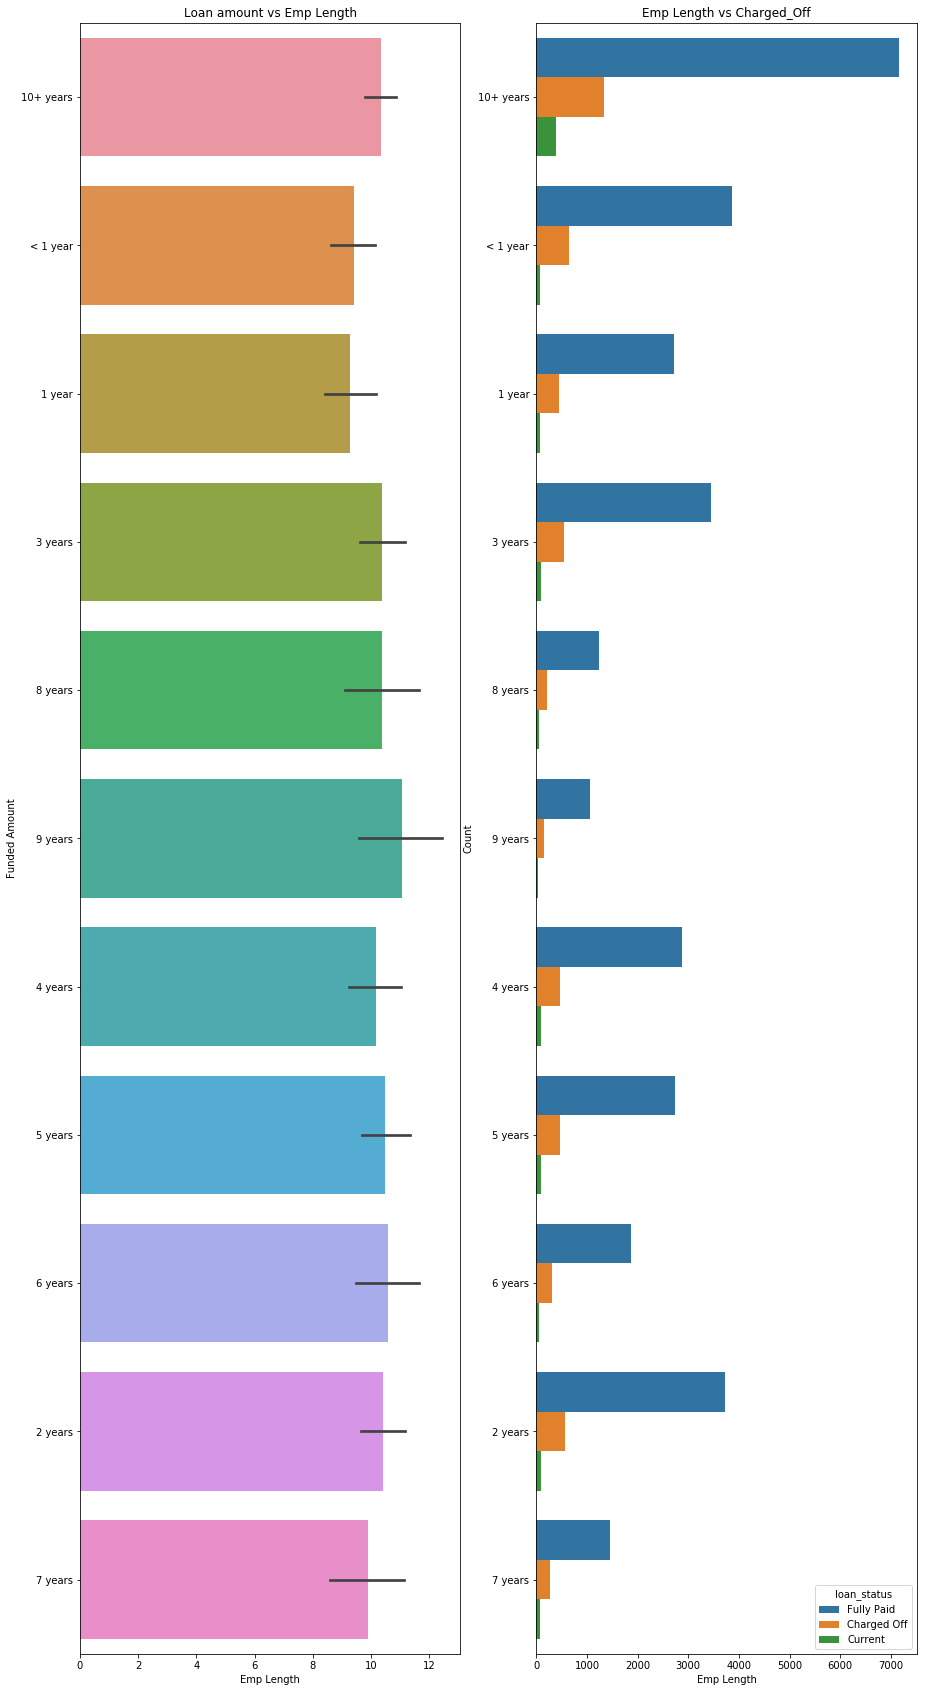

In [20]:
# Relationship between Loan and employee length
plt.figure(figsize=(15,30))

plt.subplot(1,2,1)
sns.barplot(y='emp_length',x='Payment',data=Loan)
plt.xlabel("Emp Length")
plt.ylabel("Funded Amount")

plt.title("Loan amount vs Emp Length")


plt.subplot(1,2,2)
sns.countplot(y='emp_length',hue='loan_status',data=Loan)
plt.xlabel("Emp Length")
plt.ylabel("Count")
plt.title("Emp Length vs Charged_Off")
plt.show()

In [21]:
Loan.loan_status.count()
Loan.groupby(['emp_length','loan_status']).count().id

emp_length  loan_status
1 year      Charged Off     456
            Current          71
            Fully Paid     2713
10+ years   Charged Off    1331
            Current         391
            Fully Paid     7157
2 years     Charged Off     567
            Current          97
            Fully Paid     3724
3 years     Charged Off     555
            Current          83
            Fully Paid     3457
4 years     Charged Off     462
            Current          94
            Fully Paid     2880
5 years     Charged Off     458
            Current          88
            Fully Paid     2736
6 years     Charged Off     307
            Current          61
            Fully Paid     1861
7 years     Charged Off     263
            Current          62
            Fully Paid     1448
8 years     Charged Off     203
            Current          44
            Fully Paid     1232
9 years     Charged Off     158
            Current          32
            Fully Paid     1068
< 1 year    Char

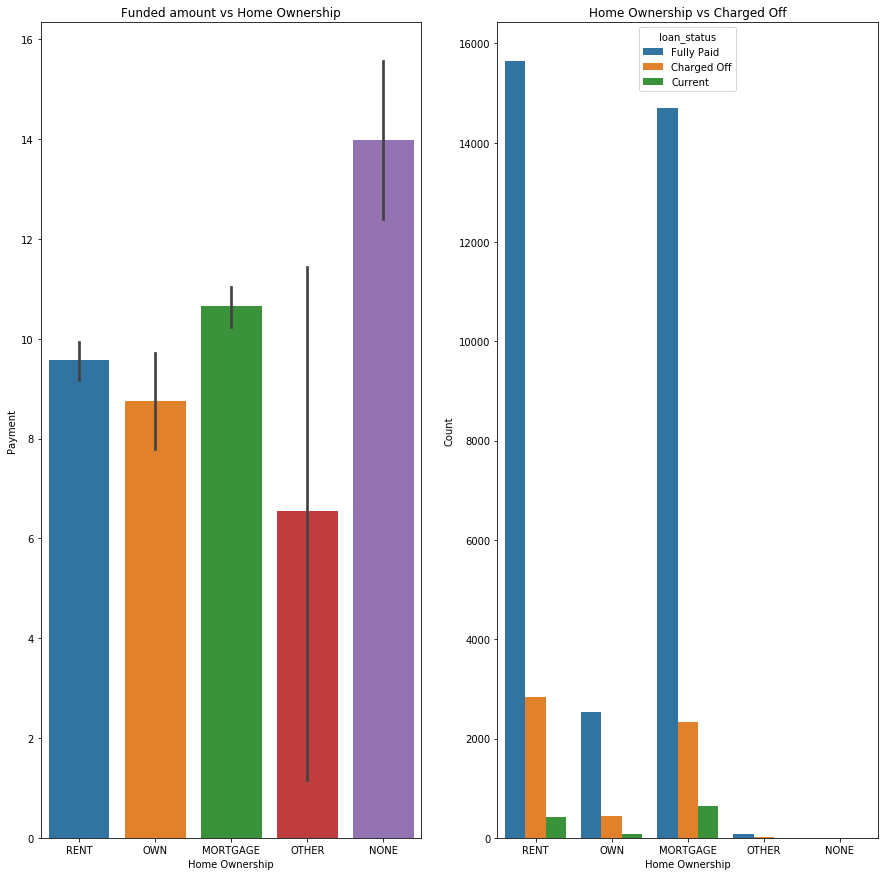

In [22]:
# Relationship between Loan and Home Owner
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='Payment',data=Loan)
plt.xlabel("Home Ownership")
plt.ylabel("Payment")

plt.title("Funded amount vs Home Ownership")


plt.subplot(1,2,2)
sns.countplot(x='home_ownership',hue='loan_status',data=Loan)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Home Ownership vs Charged Off")
plt.show()

In [23]:
Loan.loan_status.count()
Loan.groupby(['home_ownership','loan_status']).count().id

home_ownership  loan_status
MORTGAGE        Charged Off     2327
                Current          638
                Fully Paid     14694
NONE            Fully Paid         3
OTHER           Charged Off       18
                Fully Paid        80
OWN             Charged Off      443
                Current           83
                Fully Paid      2532
RENT            Charged Off     2839
                Current          419
                Fully Paid     15641
Name: id, dtype: int64

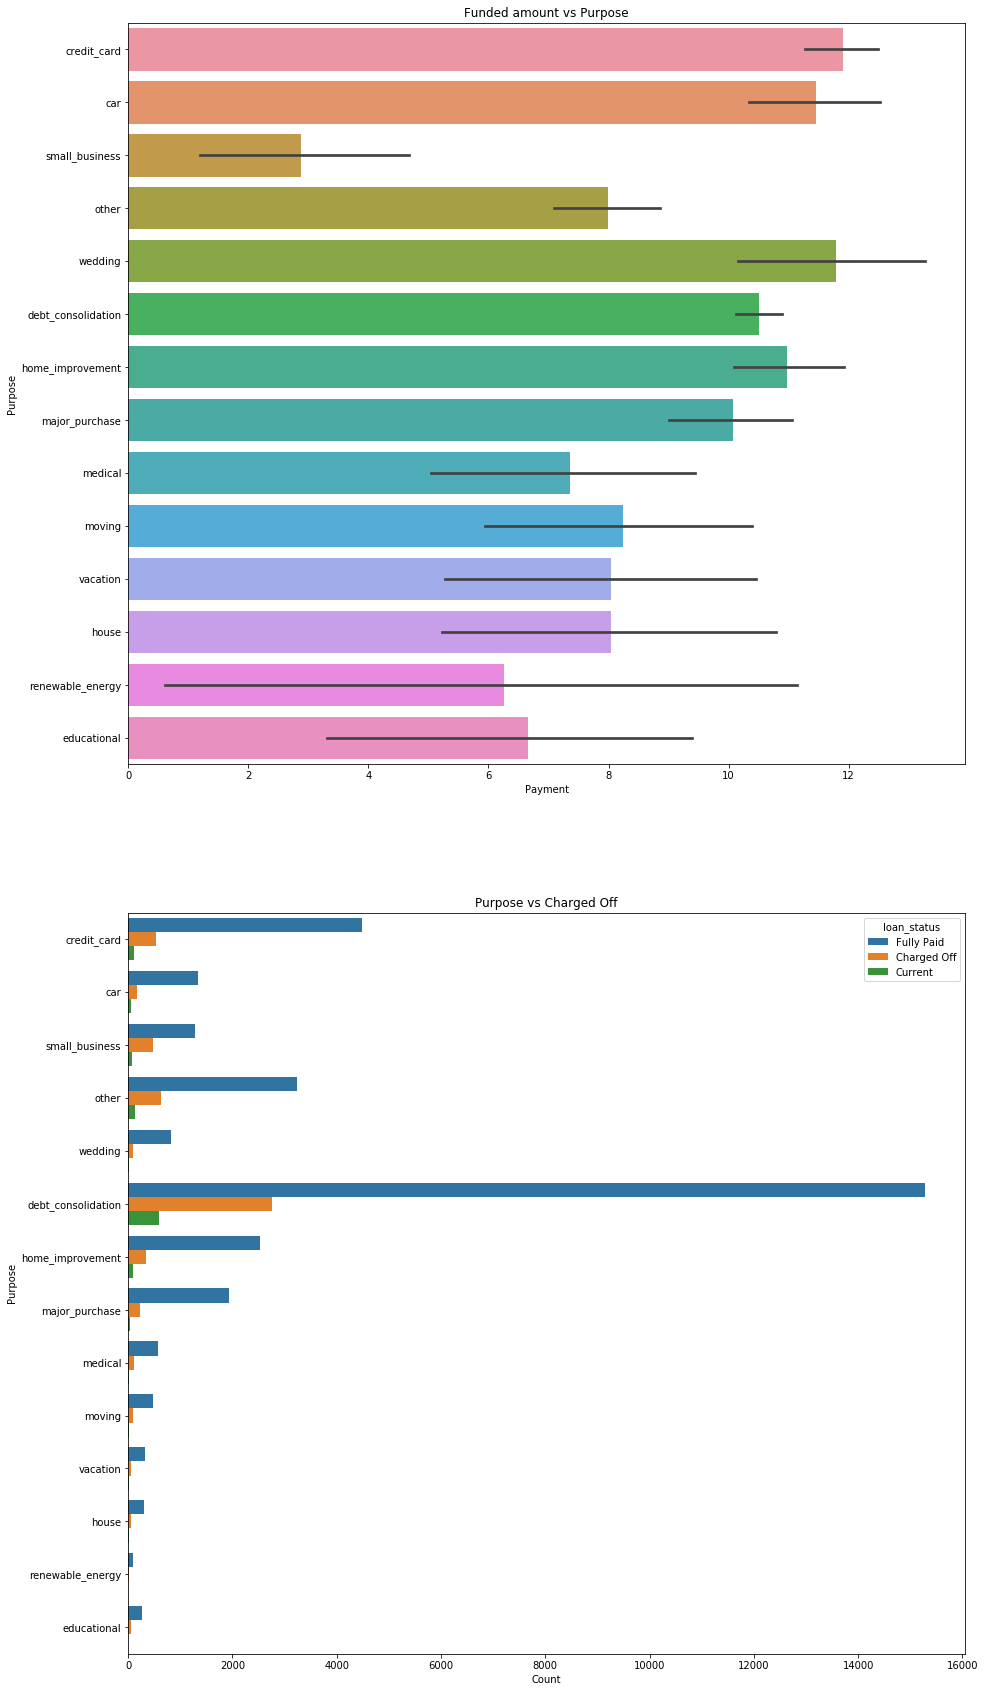

In [24]:
# Relationship between Loan and Purpose
plt.figure(figsize=(15,30))

plt.subplot(2,1,1)
sns.barplot(y='purpose',x='Payment',data=Loan)
plt.ylabel("Purpose")
plt.xlabel("Payment")
plt.title("Funded amount vs Purpose")


plt.subplot(2,1,2)
sns.countplot(y='purpose',hue='loan_status',data=Loan)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Charged Off")
plt.show()

In [25]:
Loan.loan_status.count()
Loan.groupby(['purpose','loan_status']).count().id

purpose             loan_status
car                 Charged Off      160
                    Current           50
                    Fully Paid      1339
credit_card         Charged Off      542
                    Current          103
                    Fully Paid      4485
debt_consolidation  Charged Off     2767
                    Current          586
                    Fully Paid     15288
educational         Charged Off       56
                    Fully Paid       269
home_improvement    Charged Off      347
                    Current          101
                    Fully Paid      2528
house               Charged Off       59
                    Current           14
                    Fully Paid       308
major_purchase      Charged Off      222
                    Current           37
                    Fully Paid      1928
medical             Charged Off      106
                    Current           12
                    Fully Paid       575
moving              Charg

<Figure size 3240x3240 with 0 Axes>

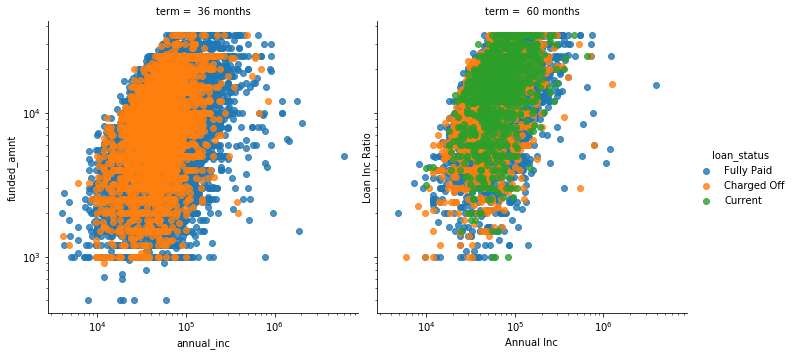

In [26]:
Loan.corr()
plt.figure(figsize=(45,45))


fgrid=sns.lmplot(y='funded_amnt',x='annual_inc',fit_reg=False,hue='loan_status',col='term',data=Loan)
ax=fgrid.axes[0][0]
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Loan Inc Ratio")
plt.xlabel("Annual Inc")

plt.show()

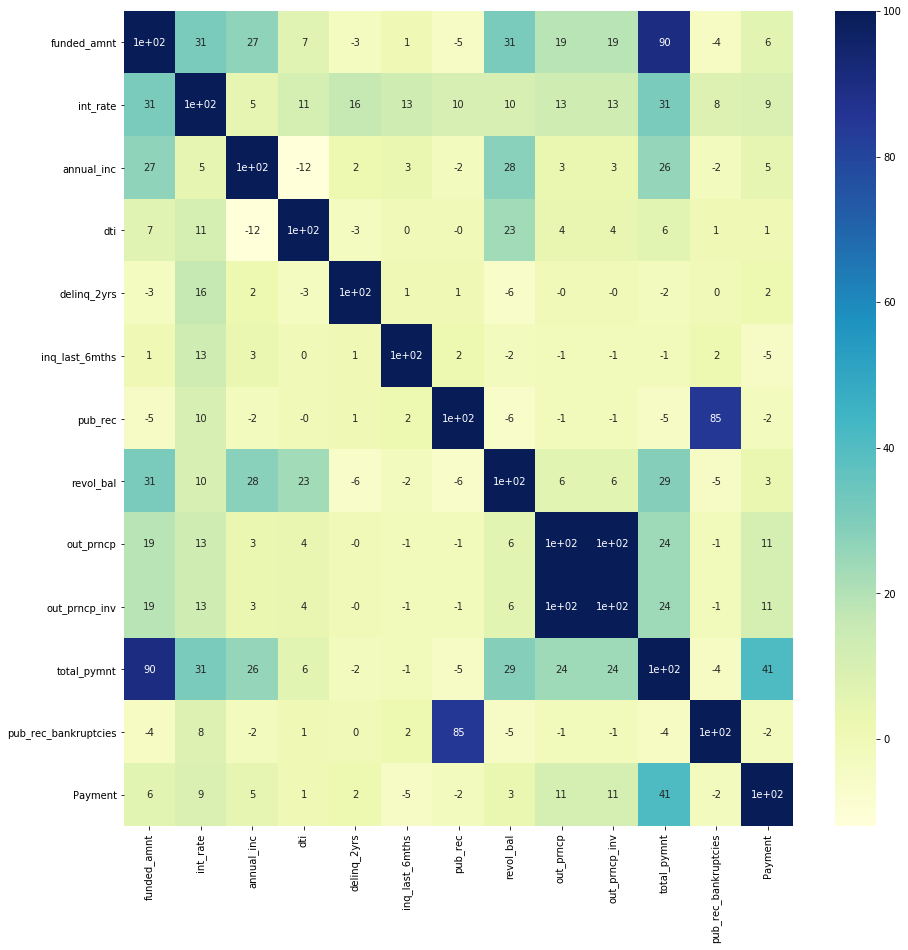

In [27]:
drop_columns=['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','installment','term','total_pymnt_inv','total_rec_prncp','id','member_id','loan_amnt','funded_amnt_inv','emp_title','earliest_cr_line','url','total_acc','open_acc','desc','title','zip_code','issue_d','sub_grade','last_credit_pull_d','last_pymnt_d']
Loan=Loan.drop(drop_columns,axis=1)
Loan.int_rate=Loan.int_rate.str.rstrip('%').astype('float')

drop_columns2=['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']
Loan=Loan.drop(drop_columns2,axis=1)



plt.figure(figsize=(15,15))
sns.heatmap(round(Loan.corr()*100,0),annot=True,cmap="YlGnBu")
plt.show()